In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scripts import combine_dirs_with_weights
import bdtcode.histogramming as H
from bdtcode.utils import *
import bdtcode.sample

In [2]:
# this is the Ultra-Legacy QCD file
# this npz files has the leading jet pt info
qcd0_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_300to470_TuneCP5_13TeV_pythia8/*.npz'))
qcd1_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_470to600_TuneCP5_13TeV_pythia8/*.npz'))
qcd2_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_600to800_TuneCP5_13TeV_pythia8/*.npz'))
qcd3_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_800to1000_TuneCP5_13TeV_pythia8/*.npz'))
qcd4_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/*.npz'))
qcd5_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/*.npz'))
qcd6_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8/*.npz'))
qcd7_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8/*.npz'))
qcd8_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/*.npz'))

print('number of events passing from preselection cuts:')
print('     PT300to470: ', qcd0_ver2['preselection'], '\n     PT470to600: ', qcd1_ver2['preselection'],'\n     PT600to800: ', qcd2_ver2['preselection'], '\n     PT800to1000: ', qcd3_ver2['preselection'],'\n     PT1000to1400: ', qcd4_ver2['preselection'],'\n     PT1400to1800: ', qcd5_ver2['preselection'],'\n     PT1800to2400: ', qcd6_ver2['preselection'],'\n     PT2400to3200: ', qcd7_ver2['preselection'],'\n     PT3200toInf: ', qcd8_ver2['preselection'])
print('preselection cuts efficiencies:')
print('     PT300to470: ', qcd0_ver2['preselection']/qcd0_ver2['total'], '\n     PT470to600: ', qcd1_ver2['preselection']/qcd1_ver2['total'],'\n     PT600to800: ', qcd2_ver2['preselection']/qcd2_ver2['total'], '\n     PT800to1000: ', qcd3_ver2['preselection']/qcd3_ver2['total'],'\n     PT1000to1400: ', qcd4_ver2['preselection']/qcd4_ver2['total'],'\n     PT1400to1800: ', qcd5_ver2['preselection']/qcd5_ver2['total'],'\n     PT1800to2400: ', qcd6_ver2['preselection']/qcd6_ver2['total'],'\n     PT2400to3200: ', qcd7_ver2['preselection']/qcd7_ver2['total'],'\n     PT3200toInf: ', qcd8_ver2['preselection']/qcd8_ver2['total'])



number of events passing from preselection cuts:
     PT300to470:  1020166 
     PT470to600:  20996171 
     PT600to800:  57173617 
     PT800to1000:  26631737 
     PT1000to1400:  10861021 
     PT1400to1800:  6732322 
     PT1800to2400:  511253 
     PT2400to3200:  1602709 
     PT3200toInf:  642277
preselection cuts efficiencies:
     PT300to470:  0.018454856274534633 
     PT470to600:  0.46787082182012657 
     PT600to800:  0.8469161728980269 
     PT800to1000:  0.845156834121418 
     PT1000to1400:  0.8191432988913191 
     PT1400to1800:  0.7755237875820759 
     PT1800to2400:  0.7335050215208034 
     PT2400to3200:  0.684918376068376 
     PT3200toInf:  0.642277


In [2]:
qcd_sel_eff = np.array([0.0185, 0.468, 0.847, 0.8452, 0.819, 0.7756, 0.7334, 0.6849, 0.6423])
#qcd_crossections = np.array([6832.0, 551.2, 156.7, 26.25, 7.465, 0.6487, 0.08734, 0.005237, 0.0001352])#reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py
qcd_crossections = np.array([7823, 648, 186.9, 32.293, 9.4183, 0.84265, 0.114943, 0.00682981, 0.000165445])#reference: SVJ AN note

qcd_pass = np.array([1068861, 24538916, 57173617, 31408678, 16160652, 8515869, 4029112, 2053302, 642277])#number of events passing control region preselection cuts

qcd_dirs = [
        '/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_300to470_TuneCP5_13TeV_pythia8',
        '/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_470to600_TuneCP5_13TeV_pythia8',
        '/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_600to800_TuneCP5_13TeV_pythia8',
        '/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_800to1000_TuneCP5_13TeV_pythia8',
        '/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8',
        '/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8',
        '/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8',
        '/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8',
        '/home/snabili/hadoop/UltraLegacy_npz/QCD_07072022_2018_UL_Summer20UL18/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8',
        ]

qcd_weights_prehem = qcd_crossections*qcd_sel_eff * 14026.948 / qcd_pass
qcd_prehem_ver2 = combine_dirs_with_weights(qcd_dirs, qcd_weights_prehem)

Counts:
0 :  1020166 available, using 1020166
1 : 20996171 available, using 93113
2 : 57173617 available, using 20861
3 : 26631737 available, using 6547
4 : 10861021 available, using 3596
5 :  6732322 available, using 578
6 :   511253 available, using 157
7 :  1602709 available, using 17
8 :   642277 available, using 1


In [3]:
# this is the Ultra-Legacy WJets file
# this npz files has the leading jet pt info
wjet0_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
wjet1_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
wjet2_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
wjet3_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
wjet4_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))

print('number of events passing from preselection cuts: ')
print('    HT400to600: ', wjet0_ver2['preselection'], '\n    HT600to800: ', wjet1_ver2['preselection'],'\n    HT800to1200: ', wjet2_ver2['preselection'], '\n    HT1200to2500: ', wjet3_ver2['preselection'],'\n    HT2500toInf: ', wjet4_ver2['preselection'])
print('preselection cuts efficiencies: ')
print('    HT400to600: ', wjet0_ver2['preselection']/wjet0_ver2['total'], '\n    HT600to800: ', wjet1_ver2['preselection']/wjet1_ver2['total'],'\n    HT800to1200: ', wjet2_ver2['preselection']/wjet2_ver2['total'], '\n    HT1200to2500: ', wjet3_ver2['preselection']/wjet3_ver2['total'],'\n    HT2500toInf: ', wjet4_ver2['preselection']/wjet4_ver2['total'])




number of events passing from preselection cuts: 
    HT400to600:  1622 
    HT600to800:  40323 
    HT800to1200:  581074 
    HT1200to2500:  2059506 
    HT2500toInf:  649032
preselection cuts efficiencies: 
    HT400to600:  0.00021789272746079743 
    HT600to800:  0.0052240222367179205 
    HT800to1200:  0.07953177218157706 
    HT1200to2500:  0.3177505639882509 
    HT2500toInf:  0.30940939566600306


In [3]:
# this is the Ultra-Legacy WJets file
# this npz files has the leading jet pt info
wjet_sel_eff = np.array([0.00022, 0.0052, 0.0795, 0.318, 0.3094])
wjet_crossections = np.array([45.25*1.139, 10.97*1.139, 4.933*1.139, 1.16*1.139, 0.02627*1.139])#reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py
wjet_dirs = [
    
    '/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/hadoop/UltraLegacy_npz/WJets_07072022_Summer20UL18/WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8'
    ]
wjet_pass = np.array([1622, 40323, 581074, 2059506, 649032]) #number of events passing control region preselection cuts

wjet_weights_prehem = wjet_crossections * wjet_sel_eff * 14026.948 /wjet_pass
wjet_prehem = combine_dirs_with_weights(wjet_dirs, wjet_weights_prehem)

Counts:
0 :     1622 available, using 1622
1 :    40323 available, using 373
2 :   581074 available, using 178
3 :  2059506 available, using 47
4 :   649032 available, using 3


In [5]:
# this is the Ultra-Legacy ZJets file
# this npz files has the leading jet pt info
zjet0_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
zjet1_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
zjet2_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
zjet3_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
zjet4_ver2 = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
print('number of events passing from preselection cuts: ')
print('    HT400to600: ', zjet0_ver2['preselection'], '\n    HT600to800: ', zjet1_ver2['preselection'],'\n    HT800to1200: ', zjet2_ver2['preselection'], '\n    HT1200to2500: ', zjet3_ver2['preselection'],'\n    HT2500toInf: ', zjet4_ver2['preselection'])
print('preselection cuts efficiencies: ')
print('    HT400to600: ', zjet0_ver2['preselection']/zjet0_ver2['total'], '\n    HT600to800: ', zjet1_ver2['preselection']/zjet1_ver2['total'],'\n    HT800to1200: ', zjet2_ver2['preselection']/zjet2_ver2['total'], '\n    HT1200to2500: ', zjet3_ver2['preselection']/zjet3_ver2['total'],'\n    HT2500toInf: ', zjet4_ver2['preselection']/zjet4_ver2['total'])



number of events passing from preselection cuts: 
    HT400to600:  1062 
    HT600to800:  46504 
    HT800to1200:  437833 
    HT1200to2500:  294915 
    HT2500toInf:  210427
preselection cuts efficiencies: 
    HT400to600:  6.025407817132617e-05 
    HT600to800:  0.01131553840175563 
    HT800to1200:  0.2056401652887904 
    HT1200to2500:  0.7726456987909195 
    HT2500toInf:  0.7845196552135528


In [4]:
# this is the Ultra-Legacy ZJets file
# this npz files has the leading jet pt info
zjet_sel_eff = np.array([0.00006, 0.011, 0.206, 0.772, 0.784])
zjet_crossections = np.array([9.921*1.1347, 2.409*1.1347, 1.078*1.1347, 0.2514*1.1347, 0.005614*1.1347])#reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py
zjet_dirs = [
    
    '/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/hadoop/UltraLegacy_npz/ZJets_07072022_Summer20UL18/ZJetsToNuNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8'
    ]
zjet_pass = np.array([1198, 67592, 437833, 294915, 210427])#number of events passing control region preselection cuts
zjet_weights_prehem = zjet_crossections * zjet_sel_eff * 14026.948 /zjet_pass
zjet_prehem = combine_dirs_with_weights(zjet_dirs, zjet_weights_prehem)

Counts:
0 :     1062 available, using 1062
1 :    46504 available, using 837
2 :   437833 available, using 1084
3 :   294915 available, using 1406
4 :   210427 available, using 44


In [7]:
ttjet0 = H.combine_npzs(glob.glob('/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_DiLept_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
ttjet1 = H.combine_npzs(glob.glob('/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_SingleLeptFromTbar_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
ttjet2 = H.combine_npzs(glob.glob('/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_SingleLeptFromT_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
ttjet3 = H.combine_npzs(glob.glob('/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
ttjet4 = H.combine_npzs(glob.glob('/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
ttjet5 = H.combine_npzs(glob.glob('/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_HT-800to1200_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
ttjet6 = H.combine_npzs(glob.glob('/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_HT-1200to2500_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
ttjet7 = H.combine_npzs(glob.glob('/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_HT-2500toInf_TuneCP5_13TeV-madgraphMLM-pythia8/*.npz'))
print('number of events passing from preselection cuts: ')
print('       TTJets_DiLept: ', ttjet0['preselection'], '\n    SingleLeptFromTbar: ', ttjet1['preselection'],'\n    SingleLeptFromT: ', ttjet2['preselection'], '\n    TuneCP5: ', ttjet3['preselection'],'\n    HT-600to800: ', ttjet4['preselection'], '\n    HT-800to1200: ', ttjet5['preselection'],  '\n    HT-1200to2500: ', ttjet6['preselection'],  '\n    HT-2500toInf: ', ttjet7['preselection'])
print('TTJets preselection efficiencies: ')
print('       TTJets_DiLept: ', ttjet0['preselection']/ttjet0['total'], '\n    SingleLeptFromTbar: ', ttjet1['preselection']/ttjet1['total'],'\n    SingleLeptFromT: ', ttjet2['preselection']/ttjet2['total'], '\n    TuneCP5: ', ttjet3['preselection']/ttjet3['total'],'\n    HT-600to800: ', ttjet4['preselection']/ttjet4['total'], '\n    HT-800to1200: ', ttjet5['preselection']/ttjet5['total'],  '\n    HT-1200to2500: ', ttjet6['preselection']/ttjet6['total'],  '\n    HT-2500toInf: ', ttjet7['preselection']/ttjet7['total'])


number of events passing from preselection cuts: 
       TTJets_DiLept:  605 
    SingleLeptFromTbar:  6994 
    SingleLeptFromT:  6887 
    TuneCP5:  11336 
    HT-600to800:  2323420 
    HT-800to1200:  2574029 
    HT-1200to2500:  783894 
    HT-2500toInf:  376202
TTJets preselection efficiencies: 
       TTJets_DiLept:  2.0655170397132695e-05 
    SingleLeptFromTbar:  0.0001195338821215784 
    SingleLeptFromT:  0.00011825763625462149 
    TuneCP5:  0.0010801999894609986 
    HT-600to800:  0.15227453957403211 
    HT-800to1200:  0.2797252550806945 
    HT-1200to2500:  0.39012686312011313 
    HT-2500toInf:  0.3757946386117449


In [5]:
ttjet_sel_eff = np.array([0.000021, 0.00012, 0.00012, 0.0011, 0.151, 0.28, 0.39, 0.376])
ttjet_crossections = np.array([88.34, 182.72, 182.72, 831.76, 2.685, 1.096, 0.194, 0.002]) #reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py
ttjet_dirs = [
    
    '/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_DiLept_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_SingleLeptFromT_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_SingleLeptFromTbar_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_HT-800to1200_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_HT-1200to2500_TuneCP5_13TeV-madgraphMLM-pythia8',
    '/home/snabili/TTJets_Samples_from_lxplus/Summer20UL18/TTJets_HT-2500toInf_TuneCP5_13TeV-madgraphMLM-pythia8'
    ]
ttjet_pass = np.array([605, 6994, 6887, 11336, 2323420, 2574029, 783894, 376202])#number of events passing control region preselection cuts
ttjet_weights_prehem = ttjet_crossections * ttjet_sel_eff * 14026.948 /ttjet_pass
ttjet_prehem = combine_dirs_with_weights(ttjet_dirs, ttjet_weights_prehem)

Counts:
0 :      605 available, using 430
1 :     6887 available, using 440
2 :     6994 available, using 447
3 :    11336 available, using 11336
4 :  2323420 available, using 24
5 :  2574029 available, using 16
6 :   783894 available, using 13
7 :   376202 available, using 0


In [12]:
print('WJets weights', wjet_weights_prehem, '\n')
print('ZJets weights', zjet_weights_prehem, '\n')
print('MJets weights', qcd_weights_prehem, '\n')
print('TTJets weights', ttjet_weights_prehem, '\n')

WJets weights [0.09805671 0.02260185 0.01078285 0.0028616  0.00020008] 

ZJets weights [0.0079085  0.00623991 0.00807275 0.01047442 0.00033291] 

MJets weights [1.89927134e+00 1.73351926e-01 3.88383017e-02 1.21893742e-02
 6.69515646e-03 1.07651291e-03 2.93479169e-04 3.19555388e-05
 2.32077152e-06] 

TTJets weights [4.30114914e-02 4.39749031e-02 4.46581200e-02 1.13212418e+00
 2.44769162e-03 1.67231597e-03 1.35385509e-03 2.80388326e-05] 



In [6]:
data_prehem = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/Data_04142022_Run2018A_UL_nortxcuts_Run2018A-UL2018-v1/JetHT/*.npz'))

In [7]:
print('preHEM number of events after preselection')
print('   MJets: ', qcd_prehem_ver2['preselection'], '\n   WJet: ', wjet_prehem['preselection'], '\n   ZJet: ', zjet_prehem['preselection'], '\n   TTJet: ', ttjet_prehem['preselection'] , '\n   Data_prehem: ', data_prehem['preselection'])
MC = qcd_prehem_ver2['preselection']+ttjet_prehem['preselection']+wjet_prehem['preselection']+zjet_prehem['preselection']
print('Data/MC: ', data_prehem['preselection']/MC)
print('*'*100)
print('total number of events ')
print('   MJets: ', qcd_prehem_ver2['total'], '\n   WJet: ', wjet_prehem['total'], '\n   ZJet: ', zjet_prehem['total'], '\n   TTJet: ', ttjet_prehem['total'] , '\n   Data_prehem: ', data_prehem['total'])
MC = qcd_prehem_ver2['total']+ttjet_prehem['total']+wjet_prehem['total']+zjet_prehem['total']
print('Data/MC: ', data_prehem['total']/MC)

preHEM number of events after preselection
   MJets:  1145036.0 
   WJet:  2223.0 
   ZJet:  4433.0 
   TTJet:  12706.0 
   Data_prehem:  7288837
Data/MC:  6.259747096783059
****************************************************************************************************
total number of events 
   MJets:  55515768.21607673 
   WJet:  7517826.631097283 
   ZJet:  17706479.233605117 
   TTJet:  38772848.67240763 
   Data_prehem:  160697615
Data/MC:  1.344604510525328


In [ ]:
# Plots:
#  1-MET
#   1-1- MET plot 
#   1-2- Computing k-factor 
#   1-3- Apply k-factor on QCD; replot MET
#   1-4- plot data & each source of bkg MET 
#   1-4- plot data & source of bkg MET stack plots
#  2-PT
#  3-MT

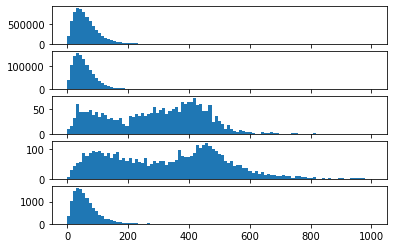

<Figure size 720x7200 with 0 Axes>

In [7]:
bins = np.linspace(0, 1000, 100)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
plt.figure(figsize=(10, 100))
val_of_prehem_bins_data,  edges_of_prehem_bins_data,  patches_data =  ax1.hist(data_prehem['met'],  bins, label='data')
val_of_prehem_bins_mjet,  edges_of_prehem_bins_mjet,  patches_mjet =  ax2.hist(qcd_prehem_ver2['met'],   bins, label='mjet')
val_of_prehem_bins_wjet,  edges_of_prehem_bins_wjet,  patches_wjet =  ax3.hist(wjet_prehem['met'],  bins, label='wjet')
val_of_prehem_bins_zjet,  edges_of_prehem_bins_zjet,  patches_zjet =  ax4.hist(zjet_prehem['met'],  bins, label='zjet')
val_of_prehem_bins_ttjet, edges_of_prehem_bins_ttjet, patches_ttjet = ax5.hist(ttjet_prehem['met'], bins, label='ttjet')

Text(0, 0.5, 'Data/MC')

<Figure size 720x7200 with 0 Axes>

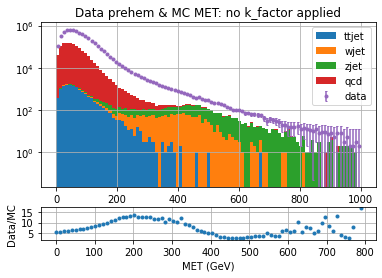

In [64]:
bins = np.linspace(0,1000,100)
fig = plt.figure(figsize=(10, 100))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})

val_of_prehem_bins_stack, edges_of_prehem_bins_stack, patches_stack = ax1.hist([ttjet_prehem['met'], wjet_prehem['met'], zjet_prehem['met'], qcd_prehem_ver2['met']], bins, label=['ttjet','wjet','zjet','qcd'], stacked=True)

tot =  val_of_prehem_bins_mjet + val_of_prehem_bins_wjet + val_of_prehem_bins_zjet + val_of_prehem_bins_ttjet

ratio = np.divide(val_of_prehem_bins_data,
                  tot,
                  where=(tot != 0))
                  
rotio = ratio[(tot!=0) & (val_of_prehem_bins_data>15)]

bin_centres = (edges_of_prehem_bins_data[:-1] + edges_of_prehem_bins_data[1:]) / 2
y_error = np.sqrt(val_of_prehem_bins_data.size)
ax1.errorbar(x=bin_centres, y=val_of_prehem_bins_data, yerr=y_error, fmt='.', capsize=1, label='data')
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC MET: no k_factor applied')
ax1.set_yscale('log')
#ax1.set_xlim(0,800)

edges = edges_of_prehem_bins_data[:len(edges_of_prehem_bins_data)-1][(tot!=0) & (val_of_prehem_bins_data>15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('MET (GeV)')
ax2.set_ylabel('Data/MC')
#ax2.set_xlim(0,800)
#ax2.set_ylim(0,5)

In [11]:
r=[np.divide(val_of_prehem_bins_data,
                  val_of_prehem_bins_mjet*i*0.05 + val_of_prehem_bins_wjet + val_of_prehem_bins_zjet + val_of_prehem_bins_ttjet,
                  where=(((val_of_prehem_bins_mjet*i*0.05 + val_of_prehem_bins_wjet + val_of_prehem_bins_zjet + val_of_prehem_bins_ttjet) > 0) & (val_of_prehem_bins_data>15))) for i in range(20,1000)]
print(len(r))
d_bar_prehem=[]
r_b=0
d_b=0

for i in range(0,980):
    r_b = sum(r[i])/len(r[i])
    #for k in range(0,99):
    for k in range(0,49):
        d_b += (r[i][k]-r_b)**2/len(r[i])
    d_bar_prehem.append(d_b)
    d_b=0

print(np.where(d_bar_prehem==min(d_bar_prehem)), min(d_bar_prehem))

i = np.arange(1.0,50, 0.05)
k_factor_prehem = i[np.where(d_bar_prehem==min(d_bar_prehem))]
print(k_factor_prehem)

980
(array([64]),) 0.6798182440821867
[4.2]


Text(0, 0.5, 'd_bar')

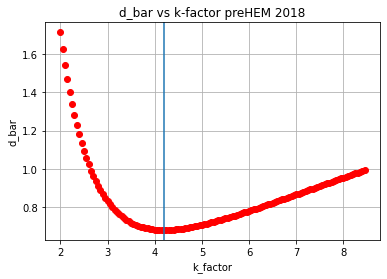

In [24]:
plt.plot(i[20:150], d_bar_prehem[20:150], 'ro')
plt.axvline(x=k_factor_prehem)
plt.grid('True')
plt.title("d_bar vs k-factor preHEM 2018")
plt.xlabel("k_factor")
plt.ylabel("d_bar")

(-0.5, 6.5)

<Figure size 720x7200 with 0 Axes>

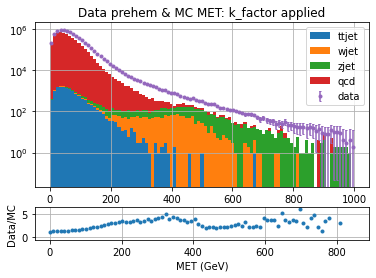

In [25]:
bins = np.linspace(0,1000,100)
fig = plt.figure(figsize=(10, 100))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})

val_of_prehem_bins_stack, edges_of_prehem_bins_stack, patches_stack = ax1.hist([ttjet_prehem['met'], wjet_prehem['met'], zjet_prehem['met'], qcd_prehem_ver2['met']], bins, label=['ttjet','wjet','zjet','qcd'], stacked=True, weights=[np.ones_like(ttjet_prehem['met']), np.ones_like(wjet_prehem['met']), np.ones_like(zjet_prehem['met']), np.ones_like(qcd_prehem_ver2['met'])*k_factor_prehem])

tot =  val_of_prehem_bins_mjet*k_factor_prehem + val_of_prehem_bins_wjet + val_of_prehem_bins_zjet + val_of_prehem_bins_ttjet


ratio = np.divide(val_of_prehem_bins_data,
                  tot,
                  where=(tot != 0))
                  
rotio = ratio[(tot!=0) & (val_of_prehem_bins_data>15)]

bin_centres = (edges_of_prehem_bins_data[:-1] + edges_of_prehem_bins_data[1:]) / 2
y_error = np.sqrt(val_of_prehem_bins_data.size)
ax1.errorbar(x=bin_centres, y=val_of_prehem_bins_data, yerr=y_error, fmt='.', capsize=1, label='data')
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC MET: k_factor applied')
ax1.set_yscale('log')
#ax1.set_xlim(0,200)

edges = edges_of_prehem_bins_data[:len(edges_of_prehem_bins_data)-1][(tot!=0) & (val_of_prehem_bins_data>15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('MET (GeV)')
ax2.set_ylabel('Data/MC')
#ax2.set_xlim(0,200)
ax2.set_ylim(-0.5,6.5)

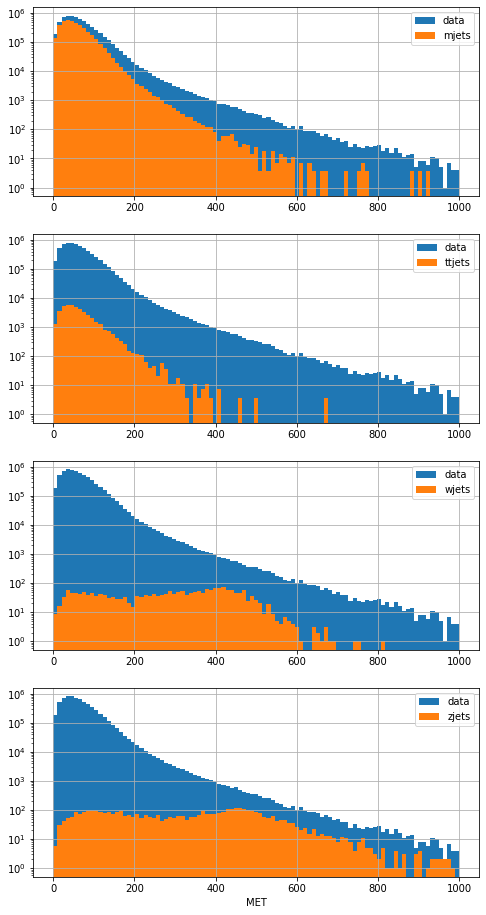

In [37]:
bins = np.linspace(0,1000,100)
fig = plt.figure(figsize=(8, 16))
ax1 = fig.add_subplot(4,1,1)
ax1.hist(data_prehem['met'],  bins, label='data')
ax1.hist(qcd_prehem_ver2['met'], bins, label='mjets', weights=np.ones_like(qcd_prehem_ver2['met'])*k_factor_prehem)
ax1.set_yscale('log')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(4,1,2)
ax2.hist(data_prehem['met'],  bins, label='data')
ax2.hist(ttjet_prehem['met'], bins, label='ttjets', weights=np.ones_like(ttjet_prehem['met']))
ax2.set_yscale('log')
ax2.legend()
ax2.grid()

ax3 = fig.add_subplot(4,1,3)
ax3.hist(data_prehem['met'],  bins, label='data')
ax3.hist(wjet_prehem['met'], bins, label='wjets', weights=np.ones_like(wjet_prehem['met']))
ax3.set_yscale('log')
ax3.legend()
ax3.grid()

ax4 = fig.add_subplot(4,1,4)
ax4.hist(data_prehem['met'],  bins, label='data')
ax4.hist(zjet_prehem['met'], bins, label='zjets', weights=np.ones_like(zjet_prehem['met']))
ax4.set_yscale('log')
ax4.set_xlabel('MET')
ax4.legend()
ax4.grid()

array([4.2])

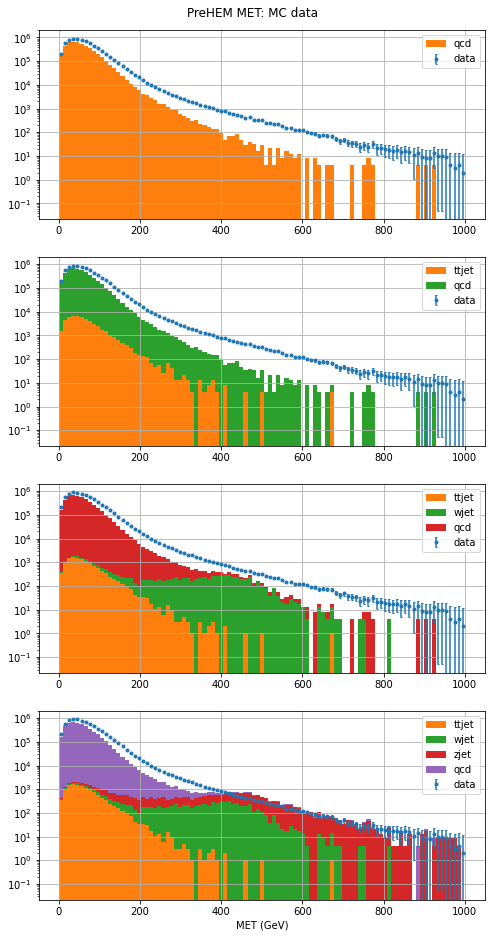

In [27]:
bins = np.linspace(0,1000,100)
fig = plt.figure(figsize=(8, 16))
fig.suptitle('PreHEM MET: MC & data k-factor applied', y=0.9)

bin_centres = (edges_of_prehem_bins_data[:-1] + edges_of_prehem_bins_data[1:]) / 2
y_error = np.sqrt(val_of_prehem_bins_data.size)

ax1 = fig.add_subplot(4,1,1)
ax1.errorbar(x=bin_centres, y=val_of_prehem_bins_data, yerr=y_error, fmt='.', capsize=1, label='data')
ax1.hist(qcd_prehem_ver2['met'], bins, label='qcd', weights=np.ones_like(qcd_prehem_ver2['met'])*k_factor_prehem)
ax1.set_yscale('log')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(4,1,2)
ax2.errorbar(x=bin_centres, y=val_of_prehem_bins_data, yerr=y_error, fmt='.', capsize=1, label='data')
ax2.hist([ttjet_prehem['met'], qcd_prehem_ver2['met']], bins, label=['ttjet','qcd'], stacked=True, weights=[np.ones_like(ttjet_prehem['met'])*k_factor_prehem, np.ones_like(qcd_prehem_ver2['met'])*k_factor_prehem])
ax2.set_yscale('log')
ax2.legend()
ax2.grid()

ax3 = fig.add_subplot(4,1,3)
ax3.errorbar(x=bin_centres, y=val_of_prehem_bins_data, yerr=y_error, fmt='.', capsize=1, label='data')
ax3.hist([ttjet_prehem['met'], wjet_prehem['met'], qcd_prehem_ver2['met']], bins, label=['ttjet','wjet','qcd'], stacked=True, weights=[np.ones_like(ttjet_prehem['met']), np.ones_like(wjet_prehem['met'])*k_factor_prehem, np.ones_like(qcd_prehem_ver2['met'])*k_factor_prehem])
ax3.set_yscale('log')
ax3.legend()
ax3.grid()

ax4 = fig.add_subplot(4,1,4)
ax4.errorbar(x=bin_centres, y=val_of_prehem_bins_data, yerr=y_error, fmt='.', capsize=1, label='data')
ax4.hist([ttjet_prehem['met'], wjet_prehem['met'], zjet_prehem['met'], qcd_prehem_ver2['met']], bins, label=['ttjet','wjet','zjet','qcd'], stacked=True, weights=[np.ones_like(ttjet_prehem['met']), np.ones_like(wjet_prehem['met'])*k_factor_prehem, np.ones_like(zjet_prehem['met'])*k_factor_prehem, np.ones_like(qcd_prehem_ver2['met'])*k_factor_prehem])
ax4.set_yscale('log')
ax4.set_xlabel('MET (GeV)')
ax4.legend()
ax4.grid()

k_factor_prehem

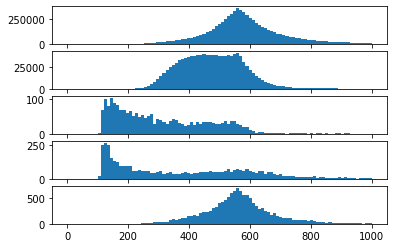

In [9]:
bins = np.linspace(0, 1000, 100)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
val_of_pt_prehem_bins_data,  edges_of_pt_prehem_bins_data,  patches_data =  ax1.hist(data_prehem['pt'],  bins, label='data')
val_of_pt_prehem_bins_mjet,  edges_of_pt_prehem_bins_mjet,  patches_mjet =  ax2.hist(qcd_prehem_ver2['pt'],   bins, label='mjet')
val_of_pt_prehem_bins_wjet,  edges_of_pt_prehem_bins_wjet,  patches_wjet =  ax3.hist(wjet_prehem['pt'],  bins, label='wjet')
val_of_pt_prehem_bins_zjet,  edges_of_pt_prehem_bins_zjet,  patches_zjet =  ax4.hist(zjet_prehem['pt'],  bins, label='zjet')
val_of_pt_prehem_bins_ttjet, edges_of_pt_prehem_bins_ttjet, patches_ttjet = ax5.hist(ttjet_prehem['pt'], bins, label='ttjet')

/tmp/ipykernel_19117/3935869965.py:12: RuntimeWarning: invalid value encountered in true_divide
  ratio = np.divide(val_of_pt_prehem_bins_data,


(0.0, 2.0)

<Figure size 720x7200 with 0 Axes>

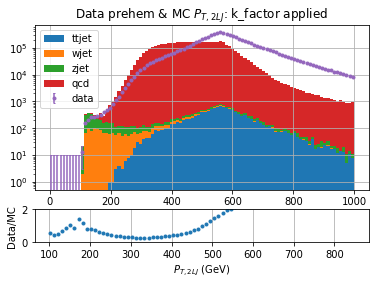

In [12]:
bins = np.linspace(0,1000,100)
fig = plt.figure(figsize=(10, 100))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})

val_of_pt_prehem_bins_stack, edges_of_pt_prehem_bins_stack, patches_stack = ax1.hist([ttjet_prehem['pt'], wjet_prehem['pt'], zjet_prehem['pt'], qcd_prehem_ver2['pt']], bins, label=['ttjet','wjet','zjet','qcd'], stacked=True, weights=[np.ones_like(ttjet_prehem['pt']), np.ones_like(wjet_prehem['pt']), np.ones_like(zjet_prehem['pt']), np.ones_like(qcd_prehem_ver2['pt'])*k_factor_prehem])
#val_of_pt_prehem_bins_stack, edges_of_pt_prehem_bins_stack, patches_stack = ax1.hist([ttjet_prehem['pt'], wjet_prehem['pt'], zjet_prehem['pt']], bins, label=['ttjet','wjet','zjet'], stacked=True, weights=[np.ones_like(ttjet_prehem['pt']), np.ones_like(wjet_prehem['pt']), np.ones_like(zjet_prehem['pt'])])

tot =  val_of_pt_prehem_bins_mjet*k_factor_prehem + val_of_pt_prehem_bins_wjet + val_of_pt_prehem_bins_zjet + val_of_pt_prehem_bins_ttjet
tot_met = val_of_prehem_bins_mjet*k_factor_prehem + val_of_prehem_bins_wjet + val_of_prehem_bins_zjet + val_of_prehem_bins_ttjet


ratio = np.divide(val_of_pt_prehem_bins_data,
                  tot,
                  where=(tot_met != 0))
                  
rotio = ratio[(tot_met!=0) & (val_of_prehem_bins_data>15)]

bin_centres = (edges_of_pt_prehem_bins_data[:-1] + edges_of_pt_prehem_bins_data[1:]) / 2
y_error = np.sqrt(val_of_pt_prehem_bins_data.size)
ax1.errorbar(x=bin_centres, y=val_of_pt_prehem_bins_data, yerr=y_error, fmt='.', capsize=1, label='data')
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC $P_{T,2LJ}$: k_factor applied')
ax1.set_yscale('log')
#ax1.set_xlim(0,750)

edges = edges_of_prehem_bins_data[:len(edges_of_prehem_bins_data)-1][(tot_met!=0) & (val_of_prehem_bins_data>15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('$P_{T,2LJ}$ (GeV)')
ax2.set_ylabel('Data/MC')
#ax2.set_xlim(200,600)
ax2.set_ylim(0,2)

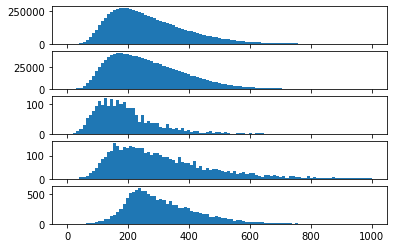

In [13]:
bins = np.linspace(0, 1000, 100)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
val_of_mt_prehem_bins_data,  edges_of_mt_prehem_bins_data,  patches_data =  ax1.hist(data_prehem['mt'],  bins, label='data')
val_of_mt_prehem_bins_mjet,  edges_of_mt_prehem_bins_mjet,  patches_mjet =  ax2.hist(qcd_prehem_ver2['mt'],   bins, label='mjet')
val_of_mt_prehem_bins_wjet,  edges_of_mt_prehem_bins_wjet,  patches_wjet =  ax3.hist(wjet_prehem['mt'],  bins, label='wjet')
val_of_mt_prehem_bins_zjet,  edges_of_mt_prehem_bins_zjet,  patches_zjet =  ax4.hist(zjet_prehem['mt'],  bins, label='zjet')
val_of_mt_prehem_bins_ttjet, edges_of_mt_prehem_bins_ttjet, patches_ttjet = ax5.hist(ttjet_prehem['mt'], bins, label='ttjet')

[4.2]


Text(0, 0.5, 'Data/MC')

<Figure size 720x7200 with 0 Axes>

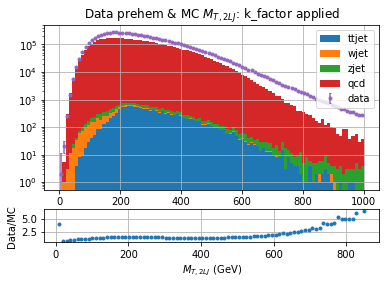

In [14]:
bins = np.linspace(0,1000,100)
fig = plt.figure(figsize=(10, 100))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})

val_of_mt_prehem_bins_stack, edges_of_mt_prehem_bins_stack, patches_stack = ax1.hist([ttjet_prehem['mt'], wjet_prehem['mt'], zjet_prehem['mt'], qcd_prehem_ver2['mt']], bins, label=['ttjet','wjet','zjet','qcd'], stacked=True, weights=[np.ones_like(ttjet_prehem['mt']), np.ones_like(wjet_prehem['mt']), np.ones_like(zjet_prehem['mt']), np.ones_like(qcd_prehem_ver2['mt'])*k_factor_prehem])
print(k_factor_prehem)
tot =  val_of_mt_prehem_bins_mjet*k_factor_prehem + val_of_mt_prehem_bins_wjet + val_of_mt_prehem_bins_zjet + val_of_mt_prehem_bins_ttjet

ratio = np.divide(val_of_mt_prehem_bins_data,
                  tot,
                  where=(tot != 0))
                  
rotio = ratio[(tot!=0) & (val_of_prehem_bins_data>15)]

bin_centres = (edges_of_mt_prehem_bins_data[:-1] + edges_of_mt_prehem_bins_data[1:]) / 2
y_error = np.sqrt(val_of_mt_prehem_bins_data.size)
ax1.errorbar(x=bin_centres, y=val_of_mt_prehem_bins_data, yerr=y_error, fmt='.', capsize=1, label='data')
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC $M_{T,2LJ}$: k_factor applied')
ax1.set_yscale('log')
#ax1.set_xlim(0,750)

edges = edges_of_mt_prehem_bins_data[:len(edges_of_mt_prehem_bins_data)-1][(tot!=0) & (val_of_prehem_bins_data>15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('$M_{T,2LJ}$ (GeV)')
ax2.set_ylabel('Data/MC')
#ax2.set_xlim(0,700)
#ax2.set_ylim(0,2.5)

Text(0.5, 0, '$\\Delta\\phi_{MET, 2LJ}$')

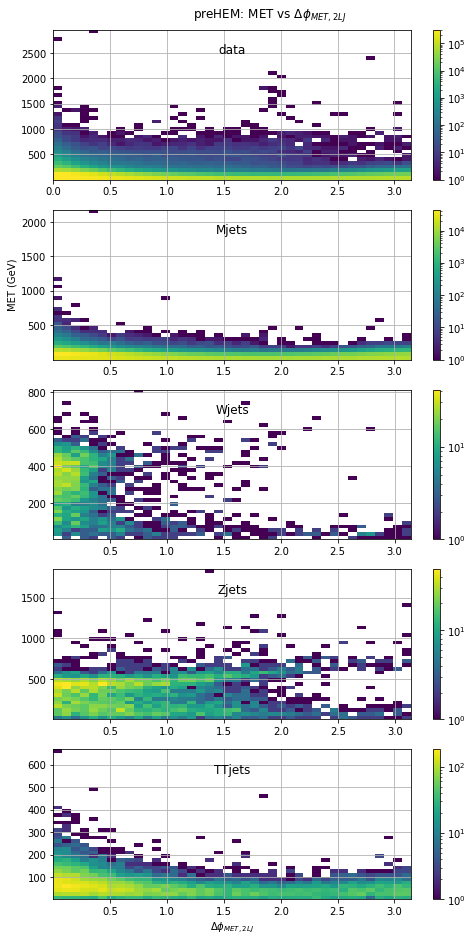

In [69]:
from bdtcode.dataset import calc_dphi

fig = plt.figure(figsize=(8, 16))
fig.suptitle('preHEM: MET vs $\Delta\phi_{MET, 2LJ}$', y=0.9)
ax1=fig.add_subplot(5,1,1)
f1=ax1.hist2d(abs(calc_dphi(data_prehem['metphi'], data_prehem['phi'])), data_prehem['met'], bins=40, norm=LogNorm())
ax1.grid(True)
ax1.set_title('data', y=0.8)
fig.colorbar(f1[3], ax=ax1)

ax2=fig.add_subplot(5,1,2)
f2=ax2.hist2d(abs(calc_dphi(qcd_prehem_ver2['metphi'], qcd_prehem_ver2['phi'])), qcd_prehem_ver2['met'], bins=40, norm=LogNorm())
ax2.grid(True)
ax2.set_ylabel('MET (GeV)')
ax2.set_title('Mjets', y=0.8)
fig.colorbar(f2[3], ax=ax2)

ax3=fig.add_subplot(5,1,3)
f3=ax3.hist2d(abs(calc_dphi(wjet_prehem['metphi'], wjet_prehem['phi'])), wjet_prehem['met'], bins=40, norm=LogNorm())
ax3.grid(True)
ax3.set_title('Wjets', y=0.8)
fig.colorbar(f3[3], ax=ax3)

ax4=fig.add_subplot(5,1,4)
f4=ax4.hist2d(abs(calc_dphi(zjet_prehem['metphi'], zjet_prehem['phi'])), zjet_prehem['met'], bins=40, norm=LogNorm())
ax4.grid(True)
ax4.set_title('Zjets', y=0.8)
fig.colorbar(f4[3], ax=ax4)

ax5=fig.add_subplot(5,1,5)
f5=ax5.hist2d(abs(calc_dphi(ttjet_prehem['metphi'], ttjet_prehem['phi'])), ttjet_prehem['met'], bins=40, norm=LogNorm())
ax5.grid(True)
ax5.set_title('TTjets', y=0.8)
fig.colorbar(f5[3], ax=ax5)
ax5.set_xlabel('$\Delta\phi_{MET, 2LJ}$')

Text(0.5, 0, '$\\Delta\\phi_{MET, 2LJ}$')

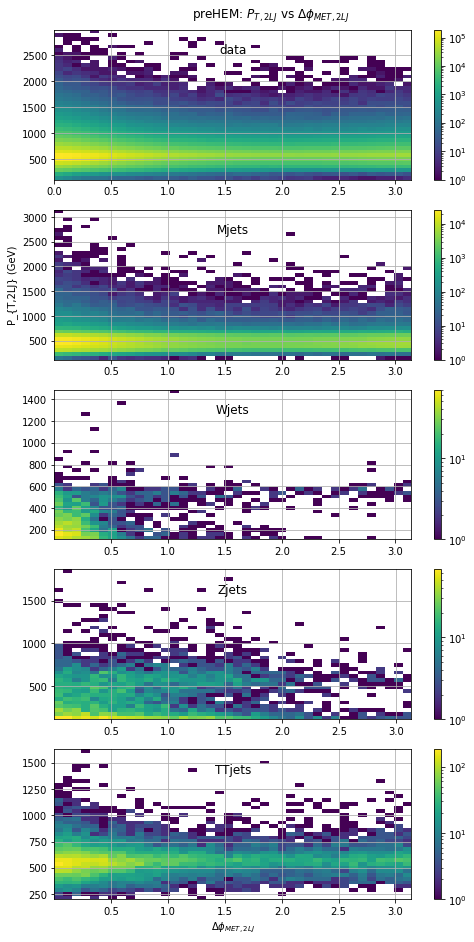

In [68]:
fig = plt.figure(figsize=(8, 16))
fig.suptitle('preHEM: $P_{T,2LJ}$ vs $\Delta\phi_{MET, 2LJ}$', y=0.9)
ax1=fig.add_subplot(5,1,1)
f1=ax1.hist2d(abs(calc_dphi(data_prehem['metphi'], data_prehem['phi'])), data_prehem['pt'], bins=40, norm=LogNorm())
ax1.grid(True)
ax1.set_title('data', y=0.8)
fig.colorbar(f1[3], ax=ax1)

ax2=fig.add_subplot(5,1,2)
f2=ax2.hist2d(abs(calc_dphi(qcd_prehem_ver2['metphi'], qcd_prehem_ver2['phi'])), qcd_prehem_ver2['pt'], bins=40, norm=LogNorm())
ax2.grid(True)
ax2.set_ylabel('P_{T,2LJ} (GeV)')
ax2.set_title('Mjets', y=0.8)
fig.colorbar(f2[3], ax=ax2)

ax3=fig.add_subplot(5,1,3)
f3=ax3.hist2d(abs(calc_dphi(wjet_prehem['metphi'], wjet_prehem['phi'])), wjet_prehem['pt'], bins=40, norm=LogNorm())
ax3.grid(True)
ax3.set_title('Wjets', y=0.8)
fig.colorbar(f3[3], ax=ax3)

ax4=fig.add_subplot(5,1,4)
f4=ax4.hist2d(abs(calc_dphi(zjet_prehem['metphi'], zjet_prehem['phi'])), zjet_prehem['pt'], bins=40, norm=LogNorm())
ax4.grid(True)
ax4.set_title('Zjets', y=0.8)
fig.colorbar(f4[3], ax=ax4)

ax5=fig.add_subplot(5,1,5)
f5=ax5.hist2d(abs(calc_dphi(ttjet_prehem['metphi'], ttjet_prehem['phi'])), ttjet_prehem['pt'], bins=40, norm=LogNorm())
ax5.grid(True)
ax5.set_title('TTjets', y=0.8)
fig.colorbar(f5[3], ax=ax5)
ax5.set_xlabel('$\Delta\phi_{MET, 2LJ}$')

Text(0.5, 0, 'MET (GeV)')

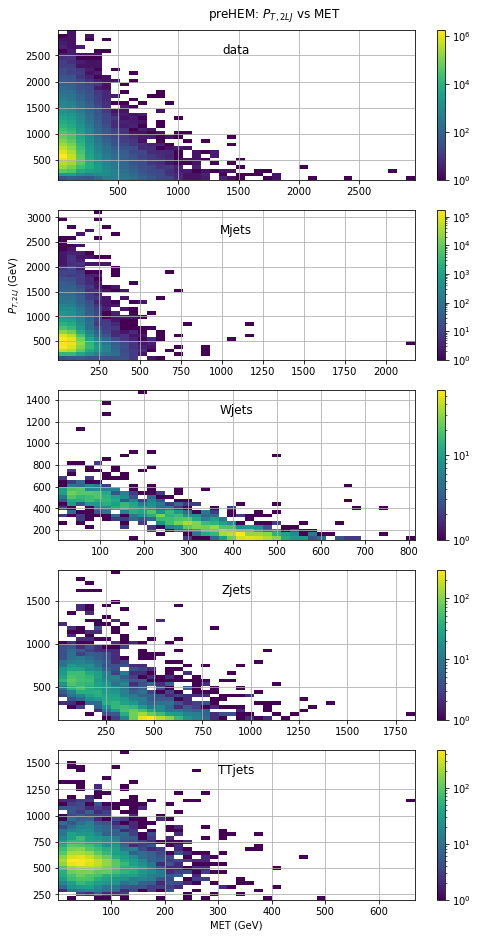

In [77]:
from bdtcode.dataset import calc_dphi

fig = plt.figure(figsize=(8, 16))
fig.suptitle('preHEM: $P_{T,2LJ}$ vs MET', y=0.9)
ax1=fig.add_subplot(5,1,1)
f1=ax1.hist2d(data_prehem['met'], data_prehem['pt'], bins=40, norm=LogNorm())
ax1.grid(True)
ax1.set_title('data', y=0.8)
fig.colorbar(f1[3], ax=ax1)

ax2=fig.add_subplot(5,1,2)
f2=ax2.hist2d(qcd_prehem_ver2['met'], qcd_prehem_ver2['pt'], bins=40, norm=LogNorm())
ax2.grid(True)
ax2.set_ylabel('$P_{T,2LJ}$ (GeV)')
ax2.set_title('Mjets', y=0.8)
fig.colorbar(f2[3], ax=ax2)

ax3=fig.add_subplot(5,1,3)
f3=ax3.hist2d(wjet_prehem['met'], wjet_prehem['pt'], bins=40, norm=LogNorm())
ax3.grid(True)
ax3.set_title('Wjets', y=0.8)
fig.colorbar(f3[3], ax=ax3)

ax4=fig.add_subplot(5,1,4)
f4=ax4.hist2d(zjet_prehem['met'], zjet_prehem['pt'], bins=40, norm=LogNorm())
ax4.grid(True)
ax4.set_title('Zjets', y=0.8)
fig.colorbar(f4[3], ax=ax4)

ax5=fig.add_subplot(5,1,5)
f5=ax5.hist2d(ttjet_prehem['met'], ttjet_prehem['pt'], bins=40, norm=LogNorm())
ax5.grid(True)
ax5.set_title('TTjets', y=0.8)
fig.colorbar(f5[3], ax=ax5)
ax5.set_xlabel('MET (GeV)')

Text(0.5, 0, 'MET (GeV)')

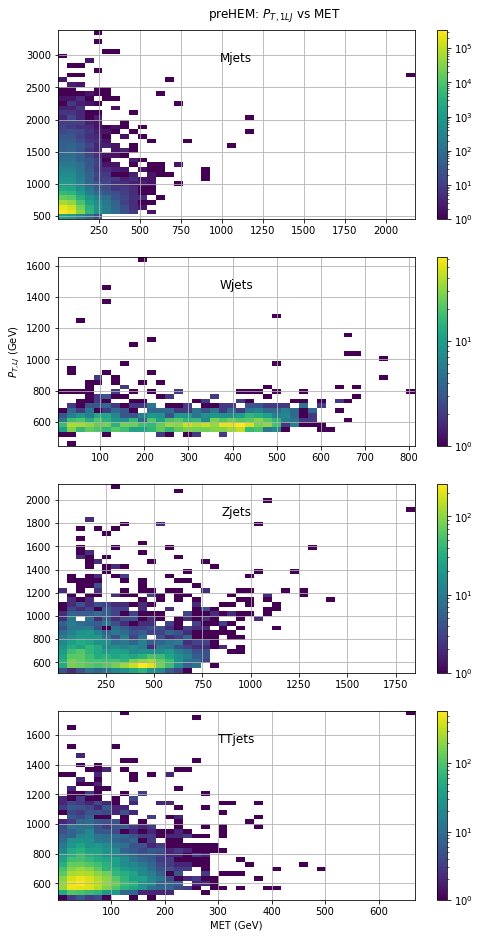

In [87]:
from bdtcode.dataset import calc_dphi

fig = plt.figure(figsize=(8, 16))
fig.suptitle('preHEM: $P_{T,1LJ}$ vs MET', y=0.9)

# can't add data Pt_1LJ vs MET 
# Pt_1LJ isn't saved in the npz files
'''ax1=fig.add_subplot(4,1,1)
f1=ax1.hist2d(data_prehem['met'], data_prehem['lj_pt'], bins=40, norm=LogNorm())
ax1.grid(True)
ax1.set_title('data', y=0.8)
fig.colorbar(f1[3], ax=ax1)
'''


ax2=fig.add_subplot(4,1,1)
f2=ax2.hist2d(qcd_prehem_ver2['met'], qcd_prehem_ver2['lj_pt'], bins=40, norm=LogNorm())
ax2.grid(True)
ax2.set_title('Mjets', y=0.8)
fig.colorbar(f2[3], ax=ax2)

ax3=fig.add_subplot(4,1,2)
f3=ax3.hist2d(wjet_prehem['met'], wjet_prehem['lj_pt'], bins=40, norm=LogNorm())
ax3.grid(True)
ax3.set_title('Wjets', y=0.8)
ax3.set_ylabel('$P_{T,LJ}$ (GeV)')
fig.colorbar(f3[3], ax=ax3)

ax4=fig.add_subplot(4,1,3)
f4=ax4.hist2d(zjet_prehem['met'], zjet_prehem['lj_pt'], bins=40, norm=LogNorm())
ax4.grid(True)
ax4.set_title('Zjets', y=0.8)
fig.colorbar(f4[3], ax=ax4)

ax5=fig.add_subplot(4,1,4)
f5=ax5.hist2d(ttjet_prehem['met'], ttjet_prehem['lj_pt'], bins=40, norm=LogNorm())
ax5.grid(True)
ax5.set_title('TTjets', y=0.8)
fig.colorbar(f5[3], ax=ax5)
ax5.set_xlabel('MET (GeV)')

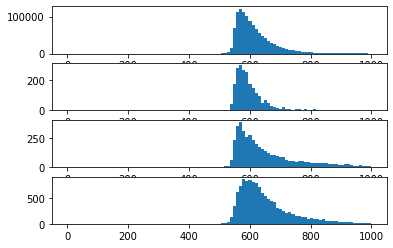

In [89]:
bins = np.linspace(0, 1000, 100)
fig, (ax2, ax3, ax4, ax5) = plt.subplots(4, 1)
val_of_lj_pt_prehem_bins_mjet,  edges_of_lj_pt_prehem_bins_mjet,  patches_mjet =  ax2.hist(qcd_prehem_ver2['lj_pt'],   bins, label='mjet')
val_of_lj_pt_prehem_bins_wjet,  edges_of_lj_pt_prehem_bins_wjet,  patches_wjet =  ax3.hist(wjet_prehem['lj_pt'],  bins, label='wjet')
val_of_lj_pt_prehem_bins_zjet,  edges_of_lj_pt_prehem_bins_zjet,  patches_zjet =  ax4.hist(zjet_prehem['lj_pt'],  bins, label='zjet')
val_of_lj_pt_prehem_bins_ttjet, edges_of_lj_pt_prehem_bins_ttjet, patches_ttjet = ax5.hist(ttjet_prehem['lj_pt'], bins, label='ttjet')

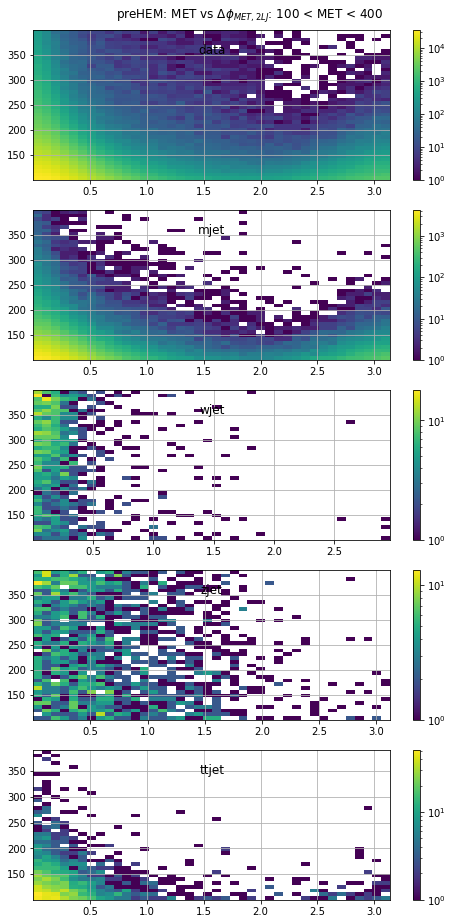

In [71]:
fig = plt.figure(figsize=(8, 16))
fig.suptitle('preHEM: MET vs $\Delta\phi_{MET, 2LJ}$: 100 < MET < 400', y=0.9)
ax1=fig.add_subplot(5,1,1)
data_metphi = data_prehem['metphi'][(data_prehem['met']>100) & (data_prehem['met']<400)] 
data_jetphi = data_prehem['phi'][(data_prehem['met']>100) & (data_prehem['met']<400)] 
data_met = data_prehem['met'][(data_prehem['met']>100) & (data_prehem['met']<400)]
f1=ax1.hist2d(abs(calc_dphi(data_metphi, data_jetphi)), data_met, bins=40, norm=LogNorm())
ax1.grid(True)
ax1.set_title('data', y=0.8)
fig.colorbar(f1[3], ax=ax1)

ax2=fig.add_subplot(5,1,2)
qcd_metphi = qcd_prehem_ver2['metphi'][(qcd_prehem_ver2['met']>100) & (qcd_prehem_ver2['met']<400)] 
qcd_jetphi = qcd_prehem_ver2['phi'][(qcd_prehem_ver2['met']>100) & (qcd_prehem_ver2['met']<400)] 
qcd_met = qcd_prehem_ver2['met'][(qcd_prehem_ver2['met']>100) & (qcd_prehem_ver2['met']<400)]
f2=ax2.hist2d(abs(calc_dphi(qcd_metphi, qcd_jetphi)), qcd_met, bins=40, norm=LogNorm())
ax2.grid(True)
ax2.set_title('mjet', y=0.8)
fig.colorbar(f2[3], ax=ax2)

ax3=fig.add_subplot(5,1,3)
wjet_metphi = wjet_prehem['metphi'][(wjet_prehem['met']>100) & (wjet_prehem['met']<400)] 
wjet_jetphi = wjet_prehem['phi'][(wjet_prehem['met']>100) & (wjet_prehem['met']<400)] 
wjet_met = wjet_prehem['met'][(wjet_prehem['met']>100) & (wjet_prehem['met']<400)]
f3=ax3.hist2d(abs(calc_dphi(wjet_metphi, wjet_jetphi)), wjet_met, bins=40, norm=LogNorm())
ax3.grid(True)
ax3.set_title('wjet', y=0.8)
fig.colorbar(f3[3], ax=ax3)

ax4=fig.add_subplot(5,1,4)
zjet_metphi = zjet_prehem['metphi'][(zjet_prehem['met']>100) & (zjet_prehem['met']<400)] 
zjet_jetphi = zjet_prehem['phi'][(zjet_prehem['met']>100) & (zjet_prehem['met']<400)] 
zjet_met = zjet_prehem['met'][(zjet_prehem['met']>100) & (zjet_prehem['met']<400)]
f4=ax4.hist2d(abs(calc_dphi(zjet_metphi, zjet_jetphi)), zjet_met, bins=40, norm=LogNorm())
ax4.grid(True)
ax4.set_title('zjet', y=0.8)
fig.colorbar(f4[3], ax=ax4)

ax5=fig.add_subplot(5,1,5)
ttjet_metphi = ttjet_prehem['metphi'][(ttjet_prehem['met']>100) & (ttjet_prehem['met']<400)] 
ttjet_jetphi = ttjet_prehem['phi'][(ttjet_prehem['met']>100) & (ttjet_prehem['met']<400)] 
ttjet_met = ttjet_prehem['met'][(ttjet_prehem['met']>100) & (ttjet_prehem['met']<400)]
f5=ax5.hist2d(abs(calc_dphi(ttjet_metphi, ttjet_jetphi)), ttjet_met, bins=40, norm=LogNorm())
ax5.grid(True)
ax5.set_title('ttjet', y=0.8)
fig.colorbar(f5[3], ax=ax5)

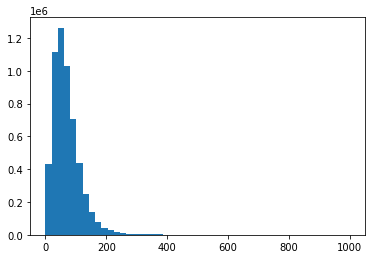

In [57]:
bins = np.linspace(0, 1000, 50)
fig, (ax1) = plt.subplots(1, 1)
val_data_met,  edges_data_met,  patches_data_met =  ax1.hist(data_prehem['met'][abs(calc_dphi(data_prehem['metphi'], data_prehem['phi']))<1.5],  bins, label='data')

50 49 49


Text(0, 0.5, 'Data/MC')

<Figure size 720x7200 with 0 Axes>

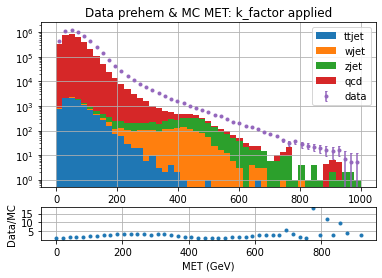

In [58]:
bins = np.linspace(0,1000,50)
fig = plt.figure(figsize=(10, 100))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})

tt_met = ttjet_prehem['met'][abs(calc_dphi(ttjet_prehem['metphi'], ttjet_prehem['phi']))<1.5]
wj_met = wjet_prehem['met'][abs(calc_dphi(wjet_prehem['metphi'], wjet_prehem['phi']))<1.5]
zj_met = zjet_prehem['met'][abs(calc_dphi(zjet_prehem['metphi'], zjet_prehem['phi']))<1.5]
mj_met = qcd_prehem_ver2['met'][abs(calc_dphi(qcd_prehem_ver2['metphi'], qcd_prehem_ver2['phi']))<1.5]

val_of_prehem_bins_stack, edges_of_prehem_bins_stack, patches_stack = ax1.hist([tt_met, wj_met, zj_met, mj_met], bins, label=['ttjet','wjet','zjet','qcd'], stacked=True, weights=[np.ones_like(tt_met), np.ones_like(wj_met), np.ones_like(zj_met), np.ones_like(mj_met)*k_factor_prehem])


tot =  val_of_prehem_bins_stack[0]+val_of_prehem_bins_stack[1]+val_of_prehem_bins_stack[2]+val_of_prehem_bins_stack[3]


ratio = np.divide(val_data_met,
                  tot,
                  where=(tot != 0))
                  
rotio = ratio[(tot!=0) & (val_data_met > 15)]

bin_centres = (edges_data_met[:-1] + edges_data_met[1:]) / 2
y_error = np.sqrt(val_data_met.size)
ax1.errorbar(x=bin_centres, y=val_data_met, yerr=y_error, fmt='.', capsize=1, label='data')
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC MET: k_factor applied')
ax1.set_yscale('log')
#ax1.set_xlim(100,400)
print(len(edges_data_met), len(val_data_met), len(tot))
edges = edges_data_met[:len(edges_data_met)-1][(tot!=0) & (val_data_met > 15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('MET (GeV)')
ax2.set_ylabel('Data/MC')
#ax2.set_xlim(0,400)
#ax2.set_ylim(-0.5,2.5)

In [ ]:
#Additional plots

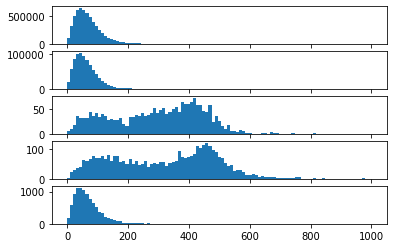

<Figure size 720x7200 with 0 Axes>

In [60]:
#check how dphi(met,2LJ) cut affects the ratio plots

bins = np.linspace(0, 1000, 100)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
plt.figure(figsize=(10, 100))
dphi_cut = 1.5
tt_met = ttjet_prehem['met'][abs(calc_dphi(ttjet_prehem['metphi'], ttjet_prehem['phi'])) < dphi_cut]
wj_met = wjet_prehem['met'][abs(calc_dphi(wjet_prehem['metphi'], wjet_prehem['phi'])) < dphi_cut]
zj_met = zjet_prehem['met'][abs(calc_dphi(zjet_prehem['metphi'], zjet_prehem['phi'])) < dphi_cut]
mj_met = qcd_prehem_ver2['met'][abs(calc_dphi(qcd_prehem_ver2['metphi'], qcd_prehem_ver2['phi'])) < dphi_cut]
data_met = data_prehem['met'][abs(calc_dphi(data_prehem['metphi'], data_prehem['phi'])) < dphi_cut]

val_of_prehem_bins_data,  edges_of_prehem_bins_data,  patches_data =  ax1.hist(data_met,  bins, label='data')
val_of_prehem_bins_mjet,  edges_of_prehem_bins_mjet,  patches_mjet =  ax2.hist(mj_met,   bins, label='mjet')
val_of_prehem_bins_wjet,  edges_of_prehem_bins_wjet,  patches_wjet =  ax3.hist(wj_met,  bins, label='wjet')
val_of_prehem_bins_zjet,  edges_of_prehem_bins_zjet,  patches_zjet =  ax4.hist(zj_met,  bins, label='zjet')
val_of_prehem_bins_ttjet, edges_of_prehem_bins_ttjet, patches_ttjet = ax5.hist(tt_met, bins, label='ttjet')